In [1]:
#Task 4: Sales Prediction using python
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load the dataset
sales = pd.read_csv(r"C:\Users\NIC\Desktop\DataScience\CodeAlpha\Advertising.csv")
print("First 5 rows:\n", sales.head())

First 5 rows:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
#Data Cleaning & Preparation
#Checking missing values
print("Missing values:\n", sales.isnull().sum())

Missing values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [4]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
#Drop unnecessary column if exists
if 'Unnamed: 0' in sales.columns:
    sales.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
#Basic statistics
print("Dataset Statistics:\n", sales.describe())

Dataset Statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [7]:
#Check data types
print("Data types:\n", sales.dtypes)

Data types:
 TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


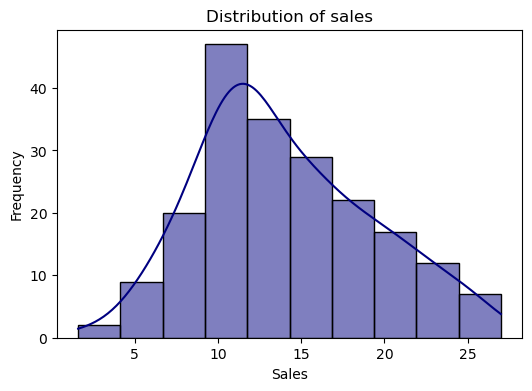

In [8]:
#Exploratory Data Analysis(EDA)
#Distribution of target variable (Sales)
plt.figure(figsize=(6,4))
sns.histplot(sales['Sales'], bins=10, kde=True, color='navy')
plt.title('Distribution of sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

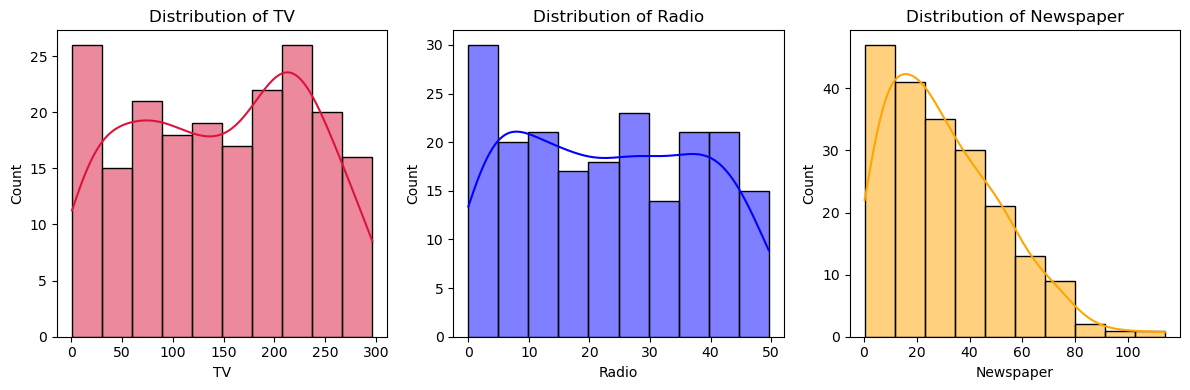

In [9]:
#Distribution of advertising spends
plt.figure(figsize=(12,4))

colors=['crimson', 'blue', 'orange']
cols = ['TV', 'Radio', 'Newspaper']

for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(sales[col], bins=10, kde=True, color=colors[i])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

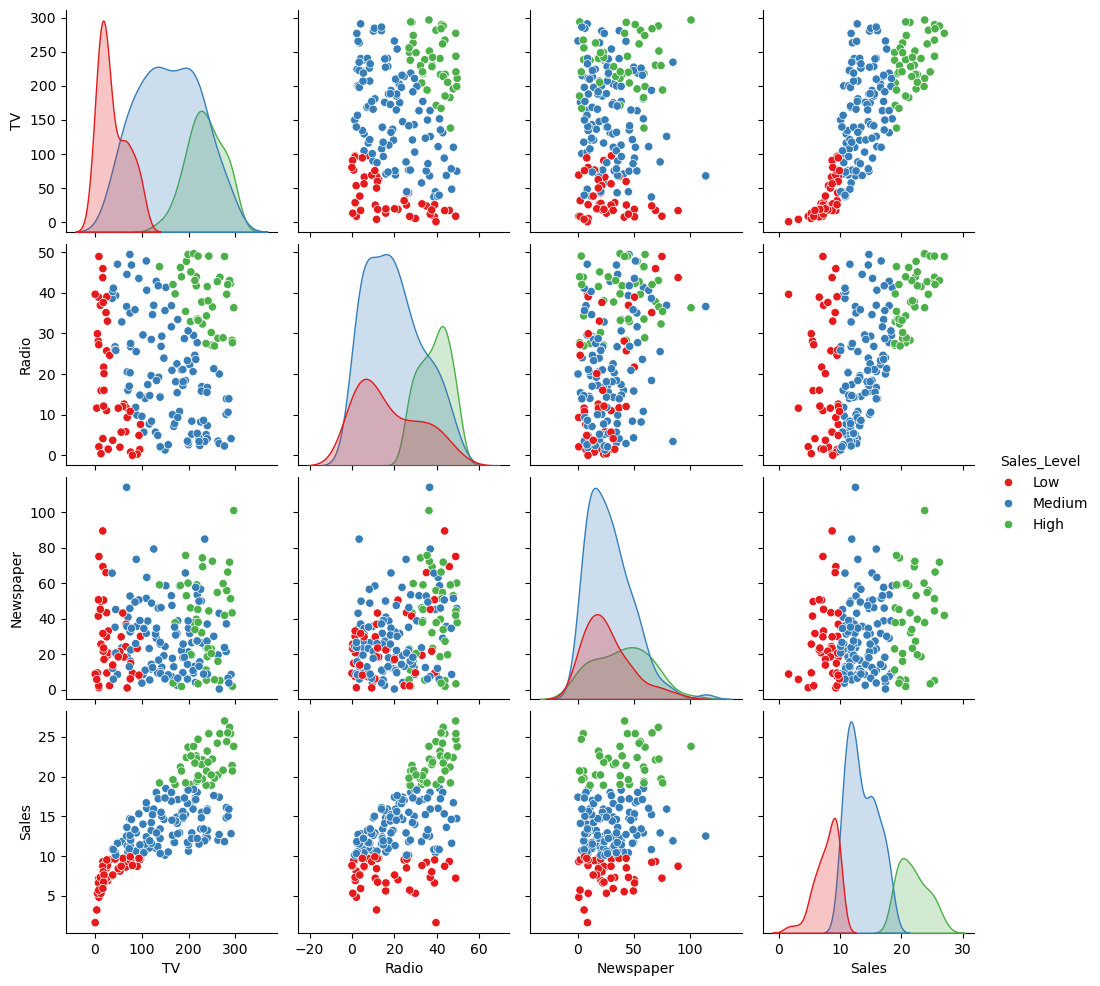

In [10]:
#Relationship between Ads and Sales
# Create Sales categories
sales['Sales_Level'] = pd.cut(sales['Sales'], bins=3, labels=['Low', 'Medium', 'High'])

# Pairplot with color by sales category
sns.pairplot(sales, hue='Sales_Level', palette='Set1')
plt.show()

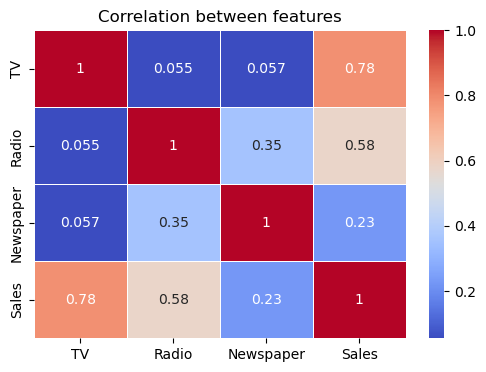

In [11]:
#Correlation Heatmap
# Select only numeric columns
numeric_sales = sales.select_dtypes(include=np.number)

plt.figure(figsize=(6,4))
sns.heatmap(numeric_sales.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between features")
plt.show()

In [12]:
#Feature Selection
X= sales[['TV', 'Radio', 'Newspaper']]
y= sales['Sales']

In [13]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
#Train the Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Make Prediction
y_pred_lr = lr_model.predict(X_test)

In [15]:
#Model Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", mae_lr)      
print("MSE:", mse_lr)      
print("RMSE:", rmse_lr)   
print("R² Score:", r2_lr)

Linear Regression Results:
MAE: 1.4607567168117597
MSE: 3.1740973539761015
RMSE: 1.7815996615334495
R² Score: 0.8994380241009121


In [16]:
#Impact of Advertising on Sales
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Impact': lr_model.coef_
})

coefficients

,Feature,Impact
0,TV,0.044730
1,Radio,0.189195
2,Newspaper,0.002761


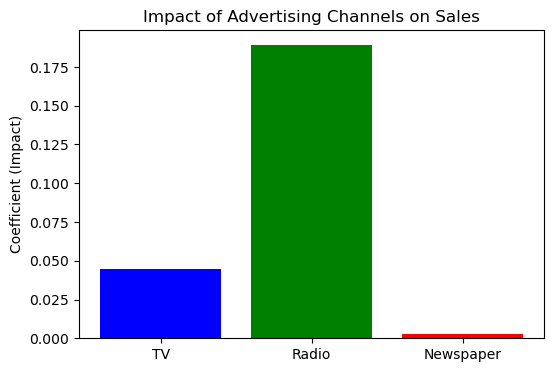

In [17]:
#Visualization
plt.figure(figsize=(6,4))
plt.bar(coefficients['Feature'], coefficients['Impact'], color=['blue','green','red'])
plt.title("Impact of Advertising Channels on Sales")
plt.ylabel("Coefficient (Impact)")
plt.show()

In [18]:
#Sales Prediction Example 
new_ad_spend = pd.DataFrame({
    'TV': [150], 
    'Radio': [30],
    'Newspaper': [20]
})
predicted_sales = lr_model.predict(new_ad_spend)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [15.41956887]
